In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from keras.models import Sequential
from keras.layers import LSTM, Dense

Data Reading

In [ ]:
data = pdr.get_data_tiingo('TSLA', api_key='a71f1d7eb99f0390b5c2e56dacaeef93179b198f')

/usr/local/lib/python3.7/dist-packages/pandas_datareader/tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


In [ ]:
data.to_csv('TSLA.csv')

Load Data

In [ ]:
data = pd.read_csv('TSLA.csv')

In [ ]:
data.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,TSLA,2017-04-17 00:00:00+00:00,301.44,304.0000,298.68,302.70,4138736,60.288,60.80000,59.736,60.540,20693680,0.0,1.0
1,TSLA,2017-04-18 00:00:00+00:00,300.25,300.8399,297.90,299.70,3035698,60.050,60.16798,59.580,59.940,15178490,0.0,1.0
2,TSLA,2017-04-19 00:00:00+00:00,305.52,306.6200,302.11,302.46,3898024,61.104,61.32400,60.422,60.492,19490120,0.0,1.0
3,TSLA,2017-04-20 00:00:00+00:00,302.51,309.1500,300.23,306.51,6149352,60.502,61.83000,60.046,61.302,30746760,0.0,1.0
4,TSLA,2017-04-21 00:00:00+00:00,305.60,306.4000,300.42,302.00,4509756,61.120,61.28000,60.084,60.400,22548780,0.0,1.0


In [ ]:
data.shape

(1258, 14)

Close Column

In [ ]:
data=data['close']

In [ ]:
data.head()

0    301.44
1    300.25
2    305.52
3    302.51
4    305.60
Name: close, dtype: float64

In [ ]:
data.shape

(1258,)

Text(0.5, 1.0, 'original data')

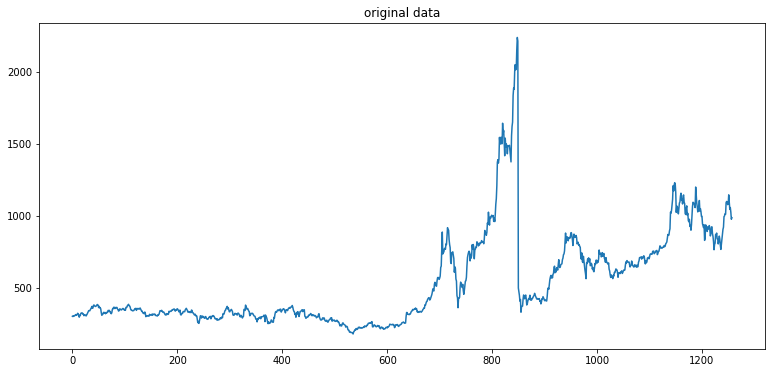

In [ ]:
plt.figure(figsize=(13,6))
plt.plot(data)
plt.title('original data')

Data Preprocessing

In [ ]:
#reshaping data
data = np.array(data).reshape(-1,1)

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
data = scaler.fit_transform(data)

Dividing the dataset into train and test

In [ ]:
train_size = int(len(data)*.70)
test_size = len(data)-train_size

train = data[:train_size,:]
test = data[train_size:, :]

In [ ]:
print('Shape of train :',train.shape)
print('Shape of test :',test.shape)

Shape of train : (880, 1)
Shape of test : (378, 1)


Feature and Label Data

In [ ]:
def feature_label_data(data, time_step=1):
    feature = []
    label = []
    for i in range(len(data)-time_step-1):
        f = data[i:(i+time_step), 0]
        l = data[i+time_step,0]
        feature.append(f)
        label.append(l)
        
    return np.array(feature), np.array(label)

In [ ]:
time_step=100
trainX,trainY = feature_label_data(train, time_step)
testX,testY = feature_label_data(test, time_step)
print('Shape of trainX is :',trainX.shape)
print('Shape of trainY is :',trainY.shape)
print('Shape of testX is :',testX.shape)
print('Shape of testY is :',testY.shape)

Shape of trainX is : (779, 100)
Shape of trainY is : (779,)
Shape of testX is : (277, 100)
Shape of testY is : (277,)


Reshaping the data

In [ ]:
trainX = trainX.reshape(trainX.shape[0], trainX.shape[1], 1)
testX = testX.reshape(testX.shape[0], testX.shape[1], 1)

Model

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(40))
model.add(Dense(1))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 40)                14560     
                                                                 
 dense_1 (Dense)             (None, 1)                 41        
                                                                 
Total params: 45,201
Trainable params: 45,201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='mean_squared_error',
              optimizer='adam')

In [ ]:
fit_history = model.fit(trainX,trainY, batch_size=64, epochs=200, validation_data=(testX,testY), verbose=1)

Epoch 1/200
13/13 [==============================] - 7s 214ms/step - loss: 0.0181 - val_loss: 0.0176
Epoch 2/200
13/13 [==============================] - 2s 124ms/step - loss: 0.0092 - val_loss: 0.0020
Epoch 3/200
13/13 [==============================] - 2s 126ms/step - loss: 0.0067 - val_loss: 0.0039
Epoch 4/200
13/13 [==============================] - 2s 128ms/step - loss: 0.0078 - val_loss: 0.0032
Epoch 5/200
13/13 [==============================] - 2s 128ms/step - loss: 0.0063 - val_loss: 0.0014
Epoch 6/200
13/13 [==============================] - 2s 123ms/step - loss: 0.0058 - val_loss: 0.0016
Epoch 7/200
13/13 [==============================] - 2s 124ms/step - loss: 0.0052 - val_loss: 0.0020
Epoch 8/200
13/13 [==============================] - 2s 125ms/step - loss: 0.0049 - val_loss: 0.0016
Epoch 9/200
13/13 [==============================] - 2s 126ms/step - loss: 0.0046 - val_loss: 0.0012
Epoch 10/200
13/13 [==============================] - 2s 126ms/step - loss: 0.0042 - val_lo

prediction and perfomance matrix

In [ ]:
trainX_predict = model.predict(trainX) 
testX_predict = model.predict(testX)

In [ ]:
#backing to original data
trainX_predict = scaler.inverse_transform(trainX_predict)
testX_predict = scaler.inverse_transform(testX_predict)

In [ ]:
trainX_predict.shape

(779, 1)

In [ ]:
testX_predict.shape

(277, 1)

RMSE

In [ ]:
#RMSE for train data
math.sqrt(mean_squared_error(trainY, trainX_predict))

560.9788929113785

In [ ]:
#RMSE for test data
math.sqrt(mean_squared_error(testY, testX_predict))

886.658746038069

Plot train and test data

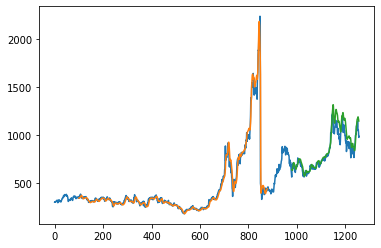

In [ ]:
# Plotting 
# shift train predictions for plotting
#look_back=100
trainPredictPlot = np.empty_like(data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[time_step:len(trainX_predict)+time_step, :] = trainX_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainX_predict)+(time_step*2)+1:len(data)-1, :] = testX_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(data))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

Prediction of next 30 days

In [ ]:
#len of test data
len(test)

378

In [ ]:
x_input = test[278:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
(1, 100)
temp_input = list(x_input)
temp_input = temp_input[0].tolist()
temp_input

[0.4453922263542708,
 0.46514190835914504,
 0.47475944032857864,
 0.4515336589344492,
 0.45491751546281634,
 0.4383720591519482,
 0.4651079241472389,
 0.4688801716688189,
 0.4447222518909786,
 0.43967316897921127,
 0.40586858790744634,
 0.4029750750080105,
 0.42372486382040797,
 0.43208012506189974,
 0.40044567866471165,
 0.40686869471496945,
 0.3822932546194253,
 0.3784578935614482,
 0.3869442367631494,
 0.3631213042169551,
 0.36586431560652105,
 0.3500228179708512,
 0.36875782850595684,
 0.40290710658419826,
 0.4311285671285282,
 0.4442076338249715,
 0.4415520104088786,
 0.4404450960782219,
 0.43275009952519194,
 0.42616687219023386,
 0.4955917622270338,
 0.47122508229034155,
 0.44138208934934786,
 0.43001194302304124,
 0.41168959791822424,
 0.4268174271038654,
 0.4298662964005865,
 0.45016943557078903,
 0.41392284612919816,
 0.42268591791356347,
 0.4134130829506063,
 0.3964889454213556,
 0.39678994844109555,
 0.37136490304789826,
 0.3646166095408247,
 0.3589849401392381,
 0.36821408

In [ ]:
lst_output=[]
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, time_step, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, time_step,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print("\n\n 30 day's output are :",lst_output)

[0.4466651]
101
1 day input [0.46514191 0.47475944 0.45153366 0.45491752 0.43837206 0.46510792
 0.46888017 0.44472225 0.43967317 0.40586859 0.40297508 0.42372486
 0.43208013 0.40044568 0.40686869 0.38229325 0.37845789 0.38694424
 0.3631213  0.36586432 0.35002282 0.36875783 0.40290711 0.43112857
 0.44420763 0.44155201 0.4404451  0.4327501  0.42616687 0.49559176
 0.47122508 0.44138209 0.43001194 0.4116896  0.42681743 0.4298663
 0.45016944 0.41392285 0.42268592 0.41341308 0.39648895 0.39678995
 0.3713649  0.36461661 0.35898494 0.36821408 0.3156308  0.32400548
 0.36787909 0.36522347 0.35279981 0.34575052 0.36137354 0.35361543
 0.3607327  0.36558759 0.35226092 0.3306324  0.3382837  0.36094146
 0.36140753 0.33857014 0.32916622 0.31195565 0.2840449  0.3018769
 0.30629485 0.33569605 0.33275398 0.34028877 0.32057793 0.32009244
 0.30372661 0.313349   0.33013234 0.32009729 0.29924555 0.28517609
 0.30242065 0.32103429 0.33626407 0.35266873 0.36032489 0.39567818
 0.39816874 0.40535882 0.40376642 0.

In [ ]:
day_new = np.arange(1,101)
day_predict = np.arange(101, 131)

In [ ]:
len(data)

1258

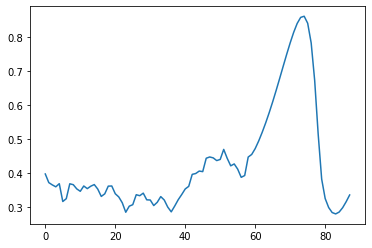

In [ ]:
#adding new data
new_add = data.tolist()
new_add.extend(lst_output)
plt.plot(new_add[1200:])

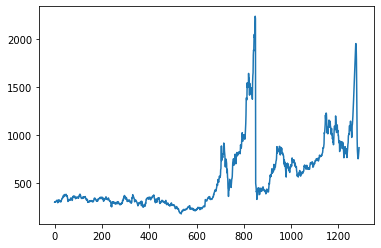

In [ ]:
#full data(with 30 day parediction)
plt.plot(scaler.inverse_transform(new_add))